## RQ1

We decided to use AWS Sagemaker to do the project. We used the three datasets that are already mounted to the AWS, downloaded them in a Data folder in Sagemaker and unzip them by using Terminal. So now we can read the CSV data with Pandas. 


In [24]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

Start to do the Exploratory Data Analysis:

### ` instagram_Profiles Data : `

In [2]:
# Read the data with pandas libarary
dfPr = pd.read_csv("./Data/instagram_profiles.csv", sep = "\t")

In [3]:
# we can see the firt five rows of our data
dfPr.head()

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,4184461,1.472039e+09,tec1025,Thomas Clark,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,4184462,3.531421e+09,luckyfluff,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN


The number of rows of Profile data set is 4509586, and the number of columns is 11

In [4]:
#Determine these information about the instagram_Profile dataset: index dtype and columns, non-null values and memory usage.
dfPr.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509586 entries, 0 to 4509585
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   sid                  4509586 non-null  int64  
 1   profile_id           4477139 non-null  float64
 2   profile_name         4509586 non-null  object 
 3   firstname_lastname   4221121 non-null  object 
 4   description          2453590 non-null  object 
 5   following            3452771 non-null  float64
 6   followers            3452771 non-null  float64
 7   n_posts              3452771 non-null  float64
 8   url                  870274 non-null   object 
 9   cts                  4071098 non-null  object 
 10  is_business_account  3445323 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 378.5+ MB


A brief summary of our data to get a better understanding of the data:
According to the two above cells, we can see that out of 11 columns, we have 1 boolean, 4 float, 1 integer and 6 object.
The is_business_account is a binary categorical column.
We have null values in all columns except in sid and profile_name columns.

In [5]:
#Check if the Profile dataset contains any duplicate data or
duplicates = dfPr.duplicated()
duplicates[duplicates == True].empty

True

The instagram_Profile data doesn't have any duplicate data.

In [6]:
#Total number of the null values
dfPr.isnull().sum().sum()

10689416

In [7]:
#Number of the rows that contain at least one null value
np.count_nonzero(dfPr.isnull().sum(axis=1)!=0)

3763522

As we understood from the section above, we have 3763522 rows that contain null values.
But according to the columns of the data, we can drop some columns that are just for indexing and are not necessary.
We are going to drop sid, profile_name and firstname_lastname columns and just keeping the profile_id column for hashing purposes.
In order to make this changes and keep our main dataframe without manipulation, first we will make a copy of the dfPr and work with it.

In [3]:
#We take a copy of our main data and work on it in order to keep our main data without manipulation and not to import it 
#for multiple times.
dfPr2 = dfPr.copy()

In [4]:
#Drop some columns
dfPr2.drop(["sid", "profile_name","firstname_lastname"], axis=1, inplace = True)
dfPr2

,profile_id,description,following,followers,n_posts,url,cts,is_business_account
0,4.721050e+09,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,5.905830e+08,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,1.074147e+09,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,1.472039e+09,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,3.531421e+09,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN
...,...,...,...,...,...,...,...,...
4509581,1.418322e+09,🙏🏻,468.0,481.0,497.0,NaN,2019-08-01 14:40:26.554 -0400,False
4509582,1.340704e+07,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:41.628 -0400,NaN
4509583,6.007354e+09,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:42.983 -0400,NaN
4509584,2.338990e+07,Fashion - travel - photography ... that's me!👗...,504.0,153.0,183.0,NaN,2019-08-01 14:40:49.982 -0400,False


Now, we are going to codify description and url columns to boolean data to make them compatible to the compiler. In the description column, instead of the profiles that have despriptions we put true and for the NaN value put False. In the url column, if there exists a url, we replace it with True otherwise False.

In [5]:
#Encoding 'description' content to boolean data.
dfPr2['description'] = dfPr2['description'].apply(lambda x: False if pd.isnull(x) else True)
dfPr2

,profile_id,description,following,followers,n_posts,url,cts,is_business_account
0,4.721050e+09,True,250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,5.905830e+08,True,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,1.074147e+09,True,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,1.472039e+09,False,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,3.531421e+09,False,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN
...,...,...,...,...,...,...,...,...
4509581,1.418322e+09,True,468.0,481.0,497.0,NaN,2019-08-01 14:40:26.554 -0400,False
4509582,1.340704e+07,False,NaN,NaN,NaN,NaN,2019-08-01 14:40:41.628 -0400,NaN
4509583,6.007354e+09,False,NaN,NaN,NaN,NaN,2019-08-01 14:40:42.983 -0400,NaN
4509584,2.338990e+07,True,504.0,153.0,183.0,NaN,2019-08-01 14:40:49.982 -0400,False


In [6]:
#Encoding 'url' content to boolean data.
dfPr2['url'] = dfPr2['url'].apply(lambda x: False if pd.isnull(x) else True)
dfPr2

,profile_id,description,following,followers,n_posts,url,cts,is_business_account
0,4.721050e+09,True,250.0,146.0,170.0,False,2019-08-01 14:38:55.394 -0400,False
1,5.905830e+08,True,534.0,1145.0,2878.0,True,2019-08-01 14:39:36.526 -0400,False
2,1.074147e+09,True,469.0,324.0,431.0,True,2019-08-01 14:39:54.407 -0400,False
3,1.472039e+09,False,NaN,NaN,NaN,False,2019-08-01 14:40:06.472 -0400,NaN
4,3.531421e+09,False,NaN,NaN,NaN,False,2019-08-01 14:40:07.806 -0400,NaN
...,...,...,...,...,...,...,...,...
4509581,1.418322e+09,True,468.0,481.0,497.0,False,2019-08-01 14:40:26.554 -0400,False
4509582,1.340704e+07,False,NaN,NaN,NaN,False,2019-08-01 14:40:41.628 -0400,NaN
4509583,6.007354e+09,False,NaN,NaN,NaN,False,2019-08-01 14:40:42.983 -0400,NaN
4509584,2.338990e+07,True,504.0,153.0,183.0,False,2019-08-01 14:40:49.982 -0400,False


In [12]:
# Number of rows and columns that contain the Null values after dropping some columns
dfPr2[dfPr2.isnull().sum(axis=1)!=0].shape

(1180398, 8)

With the above code, we found that after doing some changes in the dataset, now we have 1180398 rows with null values. We have 2 main ways to handle the missing values: Removing data and imputation. In this case, we cannot drop(remove) the null values, because the number of the null values in comparison to the total dataset is too big (almost one-third). For imputation we can use Mean, Median and Mode or interpolation/extrapolation but in our case we have sampled data randomly out of independent user value. It means that we are not able to fill the null values by help of the other values.

<b>Outliers:</b> The outliers are the extreme values within the dataset. Outliers can have a big impact on statistical analysis because they impact calculations like mean and standard deviation. We can use various techniques to visualize and identify outliers before deciding whether they should be dropped, kept, or modified. 

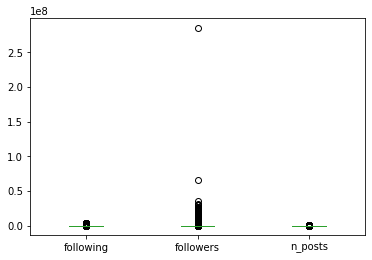

In [13]:
#Plot the boxplot in order to check if we have outliers or not
numeric_col = ["following" , "followers" , "n_posts"]
dfPr2.boxplot(numeric_col)
plt.grid(False)

By watching the boxplot we figure out that we have outliers in all tree numerical columns. So we are going to determine the exact number of the outliers.

In [2]:
#Finding outliers using statistical methods
#create a function to find outliers using IQR

def find_outliers_IQR(df):
    
   q1=df.quantile(0.25) 

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [8]:
#Outliers of the "following" column
followingOutliers = find_outliers_IQR(dfPr2["following"])  

print("number of outliers: "+ str(len(followingOutliers)))

print("max outlier value: "+ str(followingOutliers.max()))

print("min outlier value:"+ str(followingOutliers.min()))

number of outliers: 370009
max outlier value: 4191080.0
min outlier value:3399.0


In [16]:
#outliers of the "followers" column
followersOutliers = find_outliers_IQR(dfPr2["followers"])  

print("number of outliers: "+ str(len(followersOutliers)))

print("max outlier value: "+ str(followersOutliers.max()))

print("min outlier value:"+ str(followersOutliers.min()))

number of outliers: 385054
max outlier value: 285457645.0
min outlier value:2197.0


In [17]:
#outliers of the "n_posts" column
postsOutliers = find_outliers_IQR(dfPr2["n_posts"])  

print("number of outliers: "+ str(len(postsOutliers)))

print("max outlier value: "+ str(postsOutliers.max()))

print("min outlier value:"+ str(postsOutliers.min()))

number of outliers: 349151
max outlier value: 183730.0
min outlier value:1018.0


In [18]:
#Lets write a code to drop the outliers
ls = set([*find_outliers_IQR(dfPr2['following']).index.tolist() , *find_outliers_IQR(dfPr2['followers']).
          index.tolist(), *find_outliers_IQR(dfPr2['n_posts']).index.tolist()])
dfPr2.drop(ls, inplace = True)

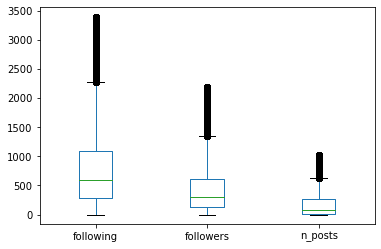

In [19]:
# Plotting the boxplot after dropping outliers
dfPr2.boxplot(numeric_col)
plt.grid(False)

We can normalize the data set to have a better understanding and compareability. The challenge here would be to handle the NULL values which prevent us to perform normalization.
Due to the size of the NULL values (Around 1 million), we need to decide whether we can afford deleting them or not.

We can normalize the dataset through:

**dfNormalized = (dfPr2 - dfPr2.mean()) / dfPr2.std()**


In [20]:
valuesD, frequencyD = np.unique(dfPr2.description.astype('str'), return_counts=True)

In [21]:
valuesU, frequencyU = np.unique(dfPr2.url.astype('str'), return_counts=True)

In [22]:
valuesB, frequencyB = np.unique(dfPr2.is_business_account.astype(str), return_counts=True)

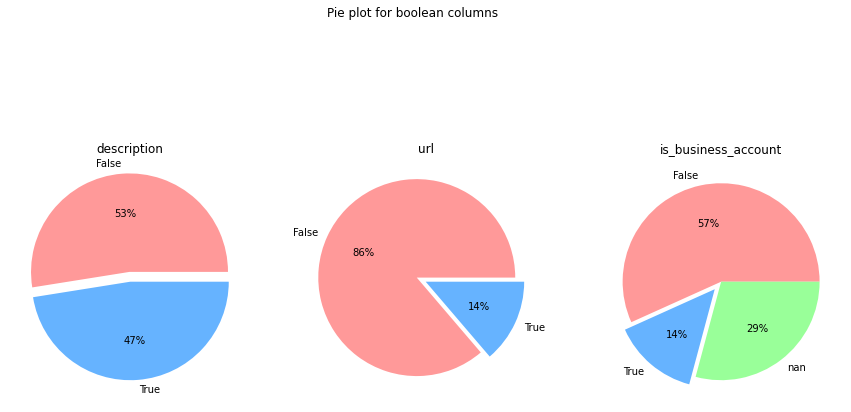

In [23]:
#plotting pie chart for boolean columns
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode1= (0.1,0)
explode2= (0,0.1,0)
fig, axes = plt.subplots(1,3, figsize =(15,8))
fig.suptitle('Pie plot for boolean columns')
axes[0].pie(frequencyD, labels=valuesD, explode=explode1, colors= colors, autopct='%.0f%%')
axes[0].set_title('description')
axes[1].pie(frequencyU, labels=valuesU, explode=explode1, colors= colors, autopct='%.0f%%')
axes[1].set_title('url')
axes[2].pie(frequencyB, labels=valuesB,explode=explode2, colors= colors, autopct='%.0f%%')
axes[2].set_title('is_business_account')
plt.show()

According to the above pie charts, we can figure out that more than half of our users(53%) have 'description' in their instagram' bio, only 14% of our users have 'url' and also, 14% of our users'instagram accout is bussiness type.

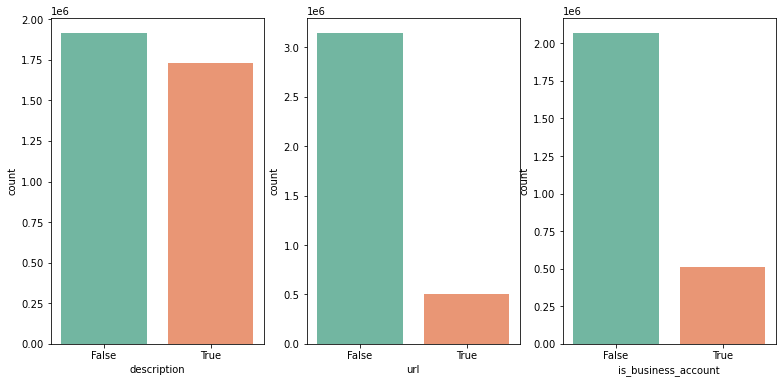

In [24]:
#Distribution of our boolean data
fig, ax =plt.subplots(1 , 3 , figsize = (13,6))
sns.countplot(x= dfPr2['description'], ax=ax[0], palette = "Set2")
sns.countplot(x= dfPr2['url'], ax=ax[1], palette = "Set2")
sns.countplot(x= dfPr2['is_business_account'], ax=ax[2], palette = "Set2")
fig.show()

<b>Countplot</b> is used to Show the counts of observations in each categorical bin using bars.

According to the above charts, most of our users are not bussines account and don't have url in their instagrams' bio. Also the number of the users that have description is a bit less than the users that have description. 

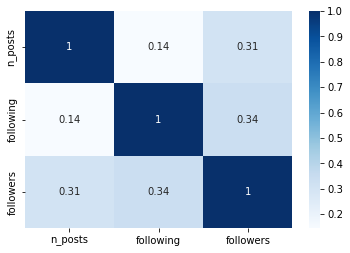

In [25]:
#plotting correlation heatmap
sns.heatmap(dfPr2[['n_posts', 'following', 'followers']].corr(), annot=True , cmap='Blues')
plt.show()

<b>Correlation heatmap :</b> This plot allows us to inspect the dataset easily and understand the relationship between variables. We have tree numerical variables in this dataset, as we can see there is no notable relationship between these tree variables. Approximately, there is no relation between the number of the posts, followers and following of an account. 

In [26]:
# Dropping Null values. Drop the rows that they have null values in "followers" and "following" columns.
dfPr2.dropna(subset=['followers' , 'following'], inplace=True)

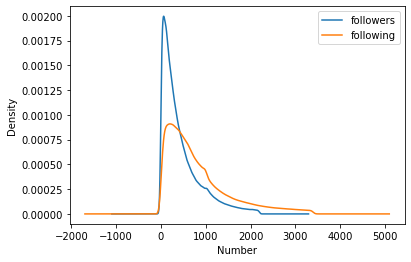

In [27]:
#plotting the density plot for tree numerical variables
fig, ax = plt.subplots(1,1)
for s in [dfPr2.followers, dfPr2.following]:
    s.plot.density()

# Plot formatting
plt.legend(["followers", "following"])
plt.xlabel('Number')
plt.ylabel('Density')
plt.show()

A <b>density plot</b> is a smoothed, continuous version of a histogram estimated (kernel density estimation) from the data. In a density plot the x-axis is the value of the variable, and y-axis is the probability density function for the kernel density estimation.

We created a density curve to capture the “shape” of this distribution, in the above plot these two plots are right skewed, it means the mean is greater than the median. Totally, the number of the 'following' is more than 'followers', because the desnsity around the zero for followers is more than the following.

### ` instagram_Locations Data : `

In [27]:
# Read the Location data with pandas
dfLoc = pd.read_csv("./Data/instagram_locations.csv" , sep = "\t")

In [28]:
# See the first five rows
dfLoc.head()

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.341864,34.153265,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703


In [29]:
# Determine the columns of dfLoc
dfLoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022658 entries, 0 to 1022657
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   sid                     1022658 non-null  int64  
 1   id                      1022658 non-null  int64  
 2   name                    1022658 non-null  object 
 3   street                  715704 non-null   object 
 4   zip                     715579 non-null   object 
 5   city                    937166 non-null   object 
 6   region                  1760 non-null     object 
 7   cd                      939010 non-null   object 
 8   phone                   601688 non-null   object 
 9   aj_exact_city_match     1000510 non-null  object 
 10  aj_exact_country_match  1000510 non-null  object 
 11  blurb                   406705 non-null   object 
 12  dir_city_id             495698 non-null   object 
 13  dir_city_name           495698 non-null   object 
 14  di

This dataset contains 1022658 rows and 23 columns. As we can understand from the above code, the number of the null values in 'region' columns is very big, according to the number of the whole data. So we will drop this column.

In [30]:
#Check if the Location data contains any duplicate data or not
duplicates = dfLoc.duplicated()
duplicates[duplicates == True].empty
#The Location data doesn't have any duplicate data.

True

In [31]:
#Number of null values for each feature
dfLoc.isna().sum()

sid                             0
id                              0
name                            0
street                     306954
zip                        307079
city                        85492
region                    1020898
cd                          83648
phone                      420970
aj_exact_city_match         22148
aj_exact_country_match      22148
blurb                      615953
dir_city_id                526960
dir_city_name              526960
dir_city_slug              527437
dir_country_id             527030
dir_country_name           526960
lat                          6163
lng                          6163
primary_alias_on_fb        597127
slug                        80990
website                    399396
cts                             0
dtype: int64

In [32]:
# The shape of the null values, the number of the rows that contain null values
dfLoc[dfLoc.isnull().sum(axis=1)!=0].shape

(1022658, 23)

According to the number of null values, at least we have one Null value in each row. So because of the big number of null values in comparison to the data, we will not drop all the null values.
But by watching the result of the above code, we have to drop some rows that contain the big number of null values

In [33]:
#We take a copy of our main data and work on it in order to keep our main data withou tmanipulation.
dfLoc2 = dfLoc.copy()

In [34]:
#drop some columns
dfLoc2.drop(["region", "blurb", "primary_alias_on_fb", "id", "name"], axis=1, inplace = True)
dfLoc2

,sid,street,zip,city,cd,phone,aj_exact_city_match,aj_exact_country_match,dir_city_id,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,slug,website,cts
0,719981,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,-0.139475,38.974391,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,NaN,NaN,Nová Vieska,SK,NaN,True,False,c2168642,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,Himalayas,+977,"Kathmandu, Nepal",NP,NaN,False,False,c1670320,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,"65, rue des Grands-Moulins",75013,"Paris, France",FR,01 81 69 18 00,False,False,c2871953,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,3800 W Alameda Ave,91505,"Burbank, California",US,(818) 569-7500,False,False,NaN,NaN,NaN,NaN,NaN,-118.341864,34.153265,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022653,719973,Suarez de Figueroa # 380,NaN,"Santa Cruz de la Sierra, Bolivia",BO,69118383,False,False,c238308,Santa Cruz de la Sierra,santa-cruz-de-la-sierra,BO,Bolivia,-63.185307,-17.786130,baby-season,NaN,2019-05-29 01:20:57.078
1022654,719975,NaN,NaN,NaN,NaN,+52 81 2089 7776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.359619,25.653550,cueva-carvajal,http://www.cuevacarvajal.mx,2019-05-29 01:21:04.434
1022655,719977,304 Orland Square Dr,60462,"Orland Park, Illinois",US,(708) 873-3747,False,False,c2774592,Manor Homes,manor-homes,US,United States,-87.843649,41.618551,the-cheesecake-factory,http://locations.thecheesecakefactory.com/il/o...,2019-05-29 01:21:13.404
1022656,719979,2 Gilmer Terrace,NaN,"Wellington, New Zealand",NZ,NaN,False,False,NaN,NaN,NaN,NaN,NaN,174.775000,-41.285800,plimmer-towers,NaN,2019-05-29 01:21:21.628


In <b> Location </b> dataset there are some approaches that can be done in order to drop some columns, for example the first tree columns(sid, id, nsme) are just for identifying so we can keep one of them. With having the langtitude and latitude of a region, we can figure out cd, street, region, zip and city by providing mapping, so these columns can be dropped. In addition, the dir data(dir_city_id,  dir_city_name, dir_city_slug, dir_country_id, dir_country_name) are internal hashing of instagram that provide the information about the location.

In [35]:
#find the number of unique country in this column
len(np.unique(dfLoc2.cd.astype(str)))

246

There is 246 unique country code in the cd column 

In [36]:
value, frequency= np.unique(dfLoc2.cd.astype(str), return_counts = True)    

In [38]:
#finding the six countries that have the most frequency in location data set
sortTemp = frequency.argsort()
sortedFreq = frequency[sortTemp[::-1]]
sortedValue = value[sortTemp[::-1]]
pieValue = sortedFreq[:7]
pieLabel = sortedValue[:7]
pieValue = np.append(pieValue, np.sum(sortedFreq[7:]))
pieLabel = np.append(pieLabel,'Other')
pieValue = np.delete(pieValue, 2)
pieLabel = np.delete(pieLabel, 2)

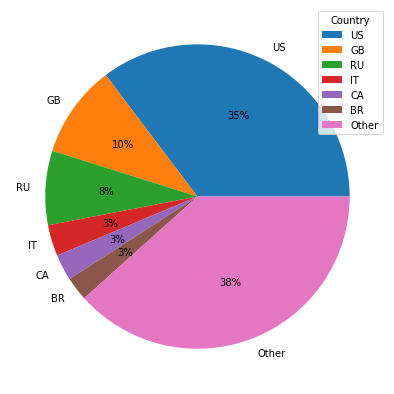

In [40]:
#plot the pie plot for the six countries with most frequencies
plt.pie(pieValue, labels=pieLabel, autopct='%.0f%%')
plt.legend(title = "Country")
plt.rcParams['figure.figsize'] = [15, 7]
plt.show()

According to the above pie plot, US has the most frequency in our dataset, it means that 35% of our posts are posted in US.

# ` instagram_Posts Data : `

In [2]:
#making a sample dataframe just by taking the first 100 rows 
sampleChunkSize = 100;
dfSample = pd.read_csv("Data/instagram_posts.csv", delimiter='\t', chunksize=sampleChunkSize)

In [3]:
#Posts dataset contains 10 columns and 42,710,197 rows
dfSample.get_chunk(10)

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,2237947779,1022366247837915,2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80,0
1,28370932,-1,BVg0pbolYBC,5579335020,457426771112991,2017-06-19 09:31:16.000,1,🙌🏼 believe in ya dreams 🙌🏼 just like I believe...,25,1
2,28370933,-1,BRgkjcXFp3Q,313429634,457426771112991,2017-03-11 20:05:03.000,1,#meraviglia #incensi #the #candele #profumo #a...,9,0
3,28370934,-1,BKTKeNhjEA7,1837592700,457426771112991,2016-09-13 16:27:16.000,1,#teatime #scorpion #friends #love #mountains #...,4,0
4,28370935,-1,8-NQrvoYLX,1131527143,457426771112991,2015-10-18 10:19:27.000,1,thE sky gavE mE a #constEllation,8,0
5,28370964,-1,BrYDPJeABJQ,16262389,282618748,2018-12-14 18:16:15.000,1,#beautiful #Christmas #lights,138,15
6,28370957,-1,BmQ418mgSnL,35673872,282618748,2018-08-09 17:53:46.000,1,As per your suggestion. #themerrytriotakeslondon,389,10
7,28370960,-1,Bm1YQ3Hn1gJ,840873396,282618748,2018-08-23 22:00:59.000,1,-Blue-💙,198,23
8,28370961,-1,2qBVjbTgzi,329994,282618748,2015-05-14 11:02:05.000,1,everything still feels so surreal ☁️,127,8
9,28370962,-1,BP5ViC6gaEf,360796468,282618748,2017-01-30 17:52:01.000,1,Guinness O'clock 🍺🍺 #london #pub #guinness #love,154,6


In [25]:
# Importing tqdm library
from tqdm import tqdm

As we know the size of the post data is so big, so in order to explore this data we can evaluate the columns separately.

## Post Type Column
In this section we evaluate 'post_type' column

In [5]:
# Importing post type column in chunks with chunkSize=100000
dfPostType = pd.DataFrame()
chunks = 100000
for chunk in tqdm(pd.read_csv('Data/instagram_posts.csv', delimiter='\t', usecols=['post_type'], chunksize=chunks)):
    dfPostType=pd.concat([dfPostType, chunk], axis=0)

428it [39:37,  5.56s/it]


In [6]:
#We take a copy of our main data and work on it in order to keep our main data without manipulation
dfPostTypeCopy = dfPostType.copy()

In [7]:
#information for 'PostType' column
dfPostType.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42710197 entries, 0 to 42710196
Data columns (total 1 columns):
 #   Column     Non-Null Count     Dtype
---  ------     --------------     -----
 0   post_type  42710197 non-null  int64
dtypes: int64(1)
memory usage: 325.9 MB


In [14]:
#the number of the null values in postType column is zero
dfPostType.isnull().sum().sum()

0

In [19]:
# Find the frequency of each post type within the dataset
vals, frequency = np.unique(dfPostTypeCopy, return_counts=True)
postType = {vals[0]:"Photo", vals[1]:"Video", vals[2]:"Multi"}

In [20]:
print("The frequency of each post type and its proportion WRT the whole dataset:")
for val, freq in zip(postType.values(), frequency):
    print(f"{val} : {freq} - {freq/len(dfPostTypeCopy)*100:{2}.{4}}%")

The frequency of each post type and its proportion WRT the whole dataset:
Photo : 41534486 - 97.25%
Video : 1134768 - 2.657%
Multi : 40943 - 0.09586%


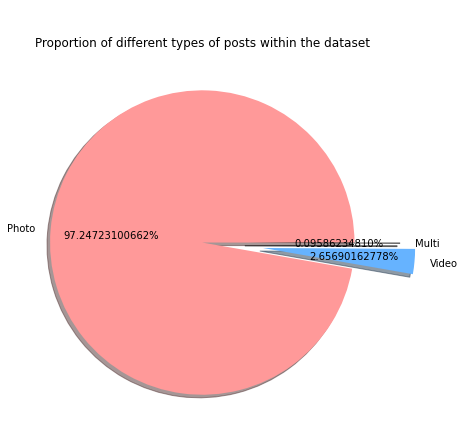

In [22]:
#plotting the pie plot for 'PostType' column
plt.figure(figsize=(7,7))
explodeVals = (0, 0.4, 0.3)
colors =  ['#ff9999','#66b3ff', '#000000']
plt.pie(frequency, labels=postType.values(), explode=explodeVals, colors=colors, autopct='%1.11f%%', shadow=True)
plt.title('\n\nProportion of different types of posts within the dataset')
plt.show()

According to the above pie plt, that shows the proportions of different types of the posts(Photo, Video, Multi).We figure out that the most of our posts are photos, and the amount of the videos and multies in comparision with photos are very low.

In [18]:
# Deleting this column to free up the memory
del dfPostType

## Number of Likes Column
In this section we evaluate 'numbr_likes' column

In [8]:
# Importing number of likes column in chunks with chunkSize=100000
dfNumLikes = pd.DataFrame()
chunks = 100000
for chunk in tqdm(pd.read_csv('Data/instagram_posts.csv', delimiter='\t', usecols=['numbr_likes'], chunksize=chunks)):
    dfNumLikes=pd.concat([dfNumLikes, chunk], axis=0)

428it [02:46,  2.57it/s]


In [9]:
#We take a copy of our main data and work on it in order to keep our main data without manipulation
dfNumLikesCopy = dfNumLikes.copy()

In [10]:
dfNumLikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42710197 entries, 0 to 42710196
Data columns (total 1 columns):
 #   Column       Dtype  
---  ------       -----  
 0   numbr_likes  float64
dtypes: float64(1)
memory usage: 325.9 MB


In [11]:
# Number of null values
dfNumLikesCopy.isnull().sum().sum()

36

In [12]:
# Dropping null values
dfNumLikesCopy.dropna(inplace=True)

In [13]:
dfNumLikesCopy.describe()

,numbr_likes
count,4.271016e+07
mean,2.835030e+02
std,6.124611e+03
min,0.000000e+00
25%,2.000000e+01
50%,4.600000e+01
75%,1.140000e+02
max,8.822952e+06


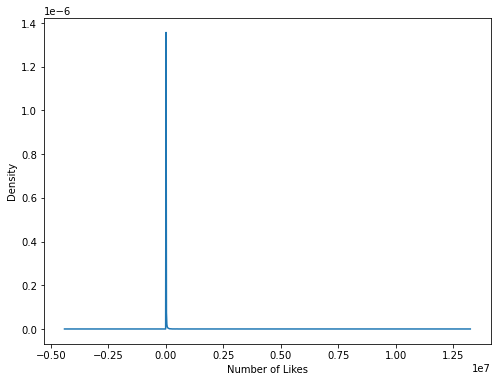

In [27]:
# Plotting the density of number of likes
plt.figure(figsize=(8,6))
ax = dfNumLikesCopy['numbr_likes'].plot.density()
plt.xlabel('Number of Likes')
plt.ylabel('Density')
plt.show()

In [14]:
#Finding outliers using statistical methods
numLikesOutliers = find_outliers_IQR(dfNumLikesCopy['numbr_likes'])

In [15]:
# Dropping outliers
dfNumLikesCopy.drop(index=numLikesOutliers.index, inplace=True)

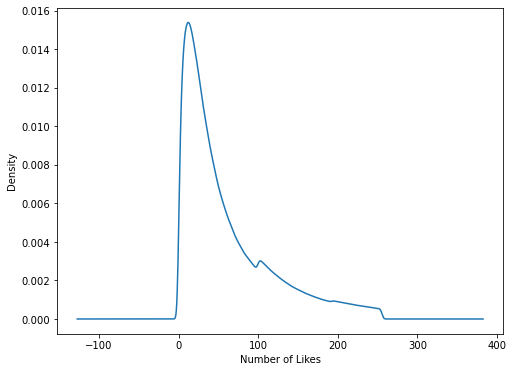

In [16]:
# Plotting the density of number of likes after dropping outliers
plt.figure(figsize=(8,6))
ax = dfNumLikesCopy['numbr_likes'].plot.density()
plt.xlabel('Number of Likes')
plt.ylabel('Density')
plt.show()

As you can see above, the distribution is right-skewed which means the mode, median and the mean are all different in this way. In fact in right-skewed distributions mean>mode.

In [17]:
# Deleting the this column to free up the memory
del dfNumLikes

## Number of Comments Column
In this section we evaluate 'number_comments' column

In [26]:
# Importing number of likes column in chunks with chunkSize=100000
dfNumComments = pd.DataFrame()
chunks = 100000
for chunk in tqdm(pd.read_csv('Data/instagram_posts.csv', delimiter='\t', usecols=['number_comments'], chunksize=chunks)):
    dfNumComments=pd.concat([dfNumComments, chunk], axis=0)

428it [02:14,  3.18it/s]


In [27]:
#We take a copy of our main data and work on it in order to keep our main data without manipulation
dfNumCommentsCopy = dfNumComments.copy()

In [28]:
dfNumComments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42710197 entries, 0 to 42710196
Data columns (total 1 columns):
 #   Column           Dtype  
---  ------           -----  
 0   number_comments  float64
dtypes: float64(1)
memory usage: 325.9 MB


In [26]:
dfNumComments.describe()

,number_comments
count,4.271016e+07
mean,7.595308e+00
std,1.941476e+02
min,0.000000e+00
25%,0.000000e+00
50%,2.000000e+00
75%,5.000000e+00
max,4.889530e+05


In [29]:
# Dropping null and dupplicate values
dfNumCommentsCopy.dropna(inplace=True)
dfNumCommentsCopy.drop_duplicates(inplace=True)

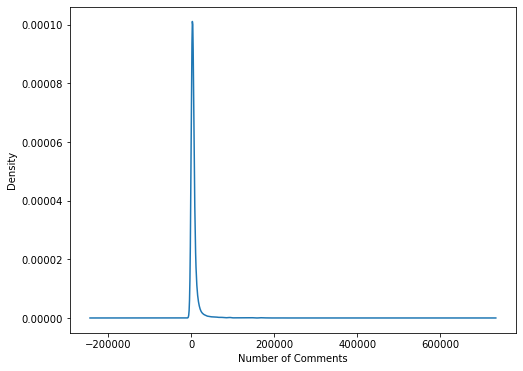

In [28]:
# Plotting the density of number of likes before droppingbm outliers
plt.figure(figsize=(8,6))
ax = dfNumCommentsCopy['number_comments'].plot.density()
plt.xlabel('Number of Comments')
plt.ylabel('Density')
plt.show()

Before dropping the outliers, as we can see in the figure above, the density chart has the most density around the zero. 

In [30]:
numCommentsOutliers = find_outliers_IQR(dfNumCommentsCopy['number_comments'])

In [31]:
# Dropping outliers from the dataset
dfNumCommentsCopy.drop(index=numCommentsOutliers.index, inplace=True)

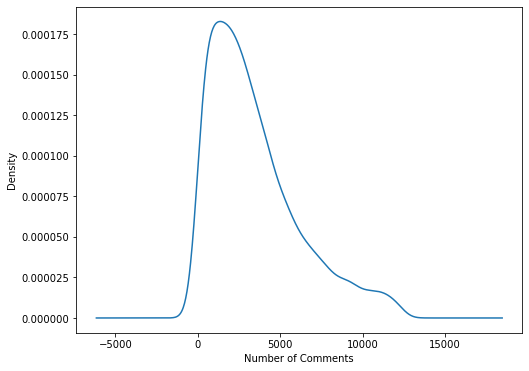

In [31]:
# Plotting the density of number of likes after dropping outliers
plt.figure(figsize=(8,6))
ax = dfNumCommentsCopy['number_comments'].plot.density()
plt.xlabel('Number of Comments')
plt.ylabel('Density')
plt.show()

After dropping the outliers, we can easily see the density of number of the comments in the figure blow. It has the most density between period of 0 to 5000

In [32]:
# Correlation between number of likes and number of comments
dfNumCommentsCopy['number_comments'].corr(dfNumLikes['numbr_likes'])

0.3389511504380232

In [32]:
# Concatenating data frames
dfTemp = pd.concat([dfPostType, dfNumLikes, dfNumComments], axis= 1)

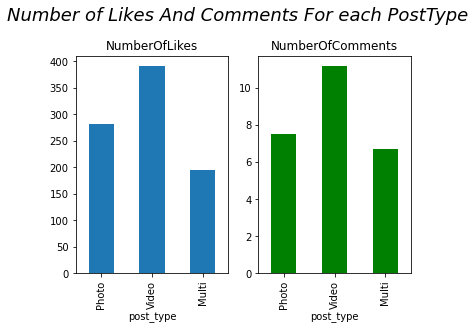

In [47]:
# Plot the bar chart to see the amount of the Likes and Comments for different types of posts
labels = ["Photo", "Video", "Multi"]

#plot1
plt.subplot(1, 2, 1)
dfTemp1 = dfTemp.groupby(['post_type'])['numbr_likes'].mean()
ax1 = dfTemp1.plot(kind='bar')
ax1.set_xticks([0,1,2], labels)
plt.title("NumberOfLikes")

#plot2
plt.subplot(1, 2, 2)
dfTemp2 = dfTemp.groupby(['post_type'])['number_comments'].mean()
ax2 = dfTemp2.plot(kind='bar', color='g')
ax2.set_xticks([0,1,2], labels)
plt.title("NumberOfComments")



plt.suptitle("Number of Likes And Comments For each PostType",y=1.05, fontsize=18, style='italic')
plt.show()

As we can see in the above bar plots, the number of the likes and comments for posts that contain video is more than the other types of the post. Also, multi posts earned the least number of likes and comments.